In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [2]:
# Load the Dataset

df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\Recommendation System\book.csv", encoding='latin-1')
df = df.rename(columns={'User.ID':'User_ID', 'Title':'Book_Title', 'Rating':'Book_Rating'})
df

,User_ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [3]:
print(df['User_ID'].nunique())
print(df['Book_Title'].nunique())
print(df['Book_Rating'].unique())

2182
9659
[ 5  3  6  8  7 10  9  4  1  2]


In [4]:
df.describe()

,User_ID,Book_Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [5]:
df.isna().sum()

User_ID        0
Book_Title     0
Book_Rating    0
dtype: int64

In [6]:
df.isnull().sum()

User_ID        0
Book_Title     0
Book_Rating    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [8]:
df = df.drop_duplicates(subset=['User_ID', 'Book_Title'], keep='last')
user_item_matrix = df.pivot(index='User_ID', columns='Book_Title', values='Book_Rating').fillna(0)
user_item_matrix

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(user_item_matrix.T)

In [10]:
'''def recommend_books(user, user_item_matrix, cosine_sim, top_n=5):
    user_ratings = user_item_matrix.loc[user]
    similar_books = cosine_sim.dot(user_ratings)
    recommended_books = similar_books.sort_values(ascending=False)
    return recommended_books.head(top_n)'''

'def recommend_books(user, user_item_matrix, cosine_sim, top_n=5):\n    user_ratings = user_item_matrix.loc[user]\n    similar_books = cosine_sim.dot(user_ratings)\n    recommended_books = similar_books.sort_values(ascending=False)\n    return recommended_books.head(top_n)'

Text(0, 0.5, 'Count')

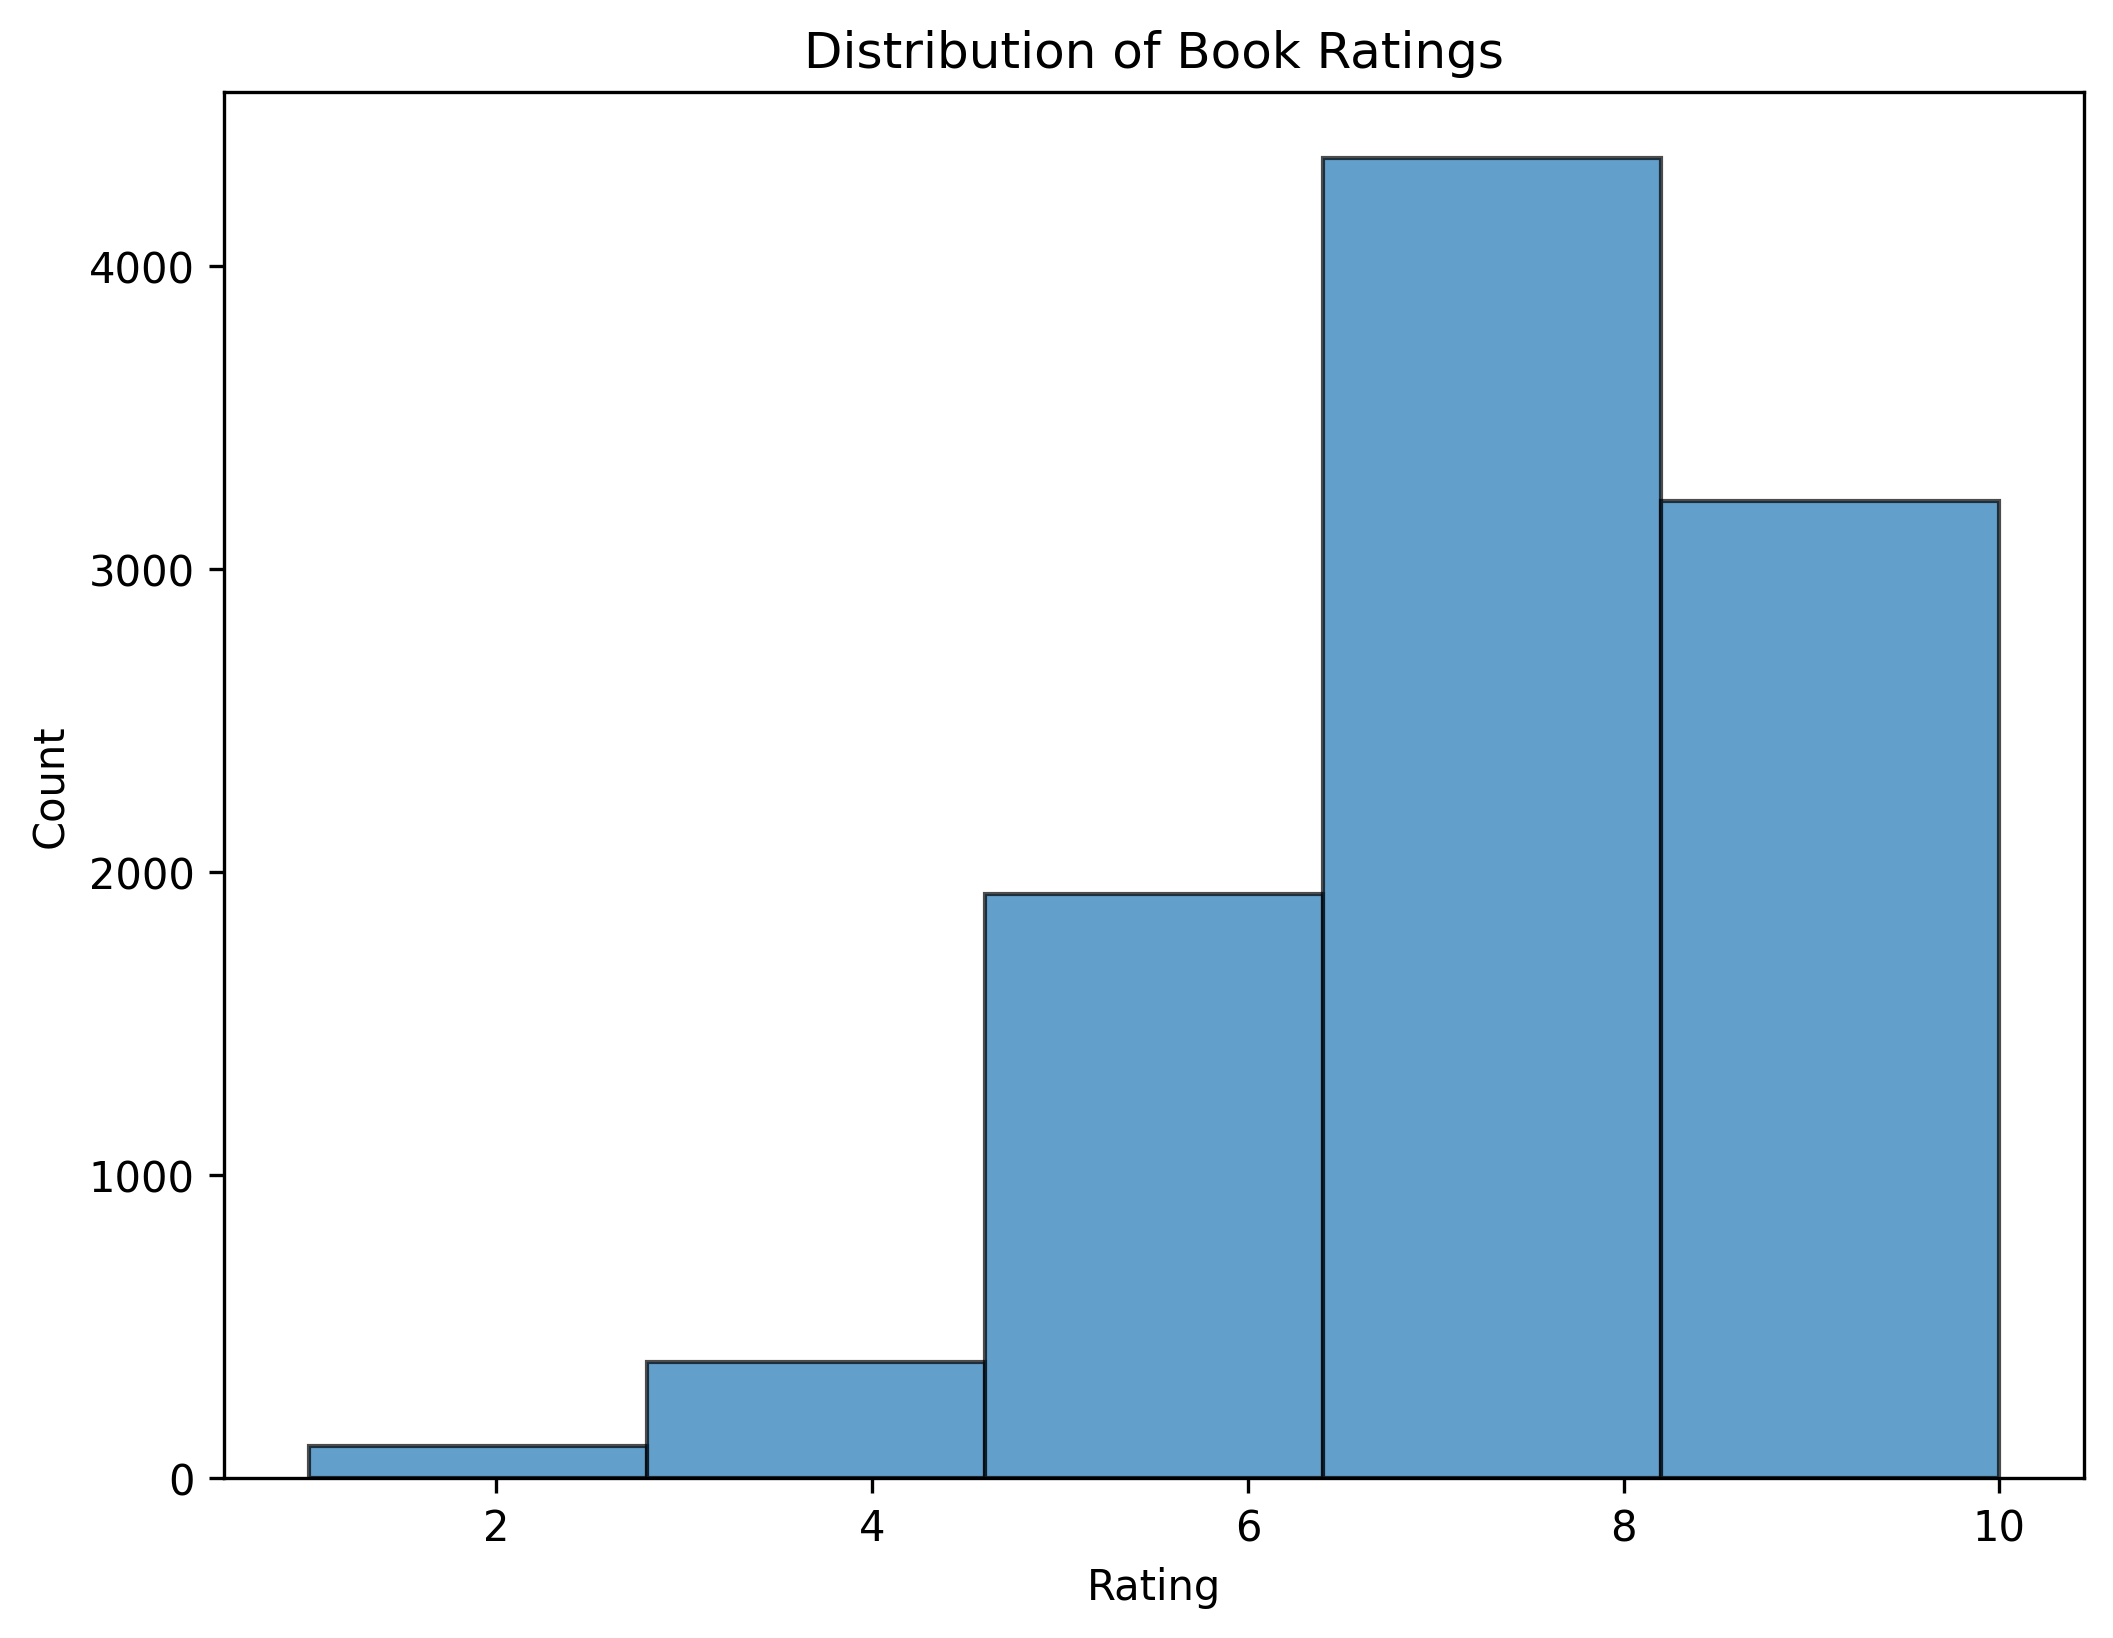

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['Book_Rating'], bins=5, edgecolor='k', alpha=0.7)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)'),
  Text(1, 0, 'The Angel Is Near'),
  Text(2, 0, 'Dreaming'),
  Text(3, 0, 'Dreaming in Cuban'),
  Text(4, 0, 'Dreammaker (Harlequin Historicals, No. 486)'),
  Text(5, 0, 'Dreams of Dead Womens Handbags'),
  Text(6, 0, 'The Autumn of the Patriarch (Perennial Classics)'),
  Text(7, 0, 'Dreamscapes: Dark Moon'),
  Text(8, 0, 'The Autobiography of My Mother'),
  Text(9, 0, 'The Austere Academy (A Series of Unfortunate Events, Book 5)')])

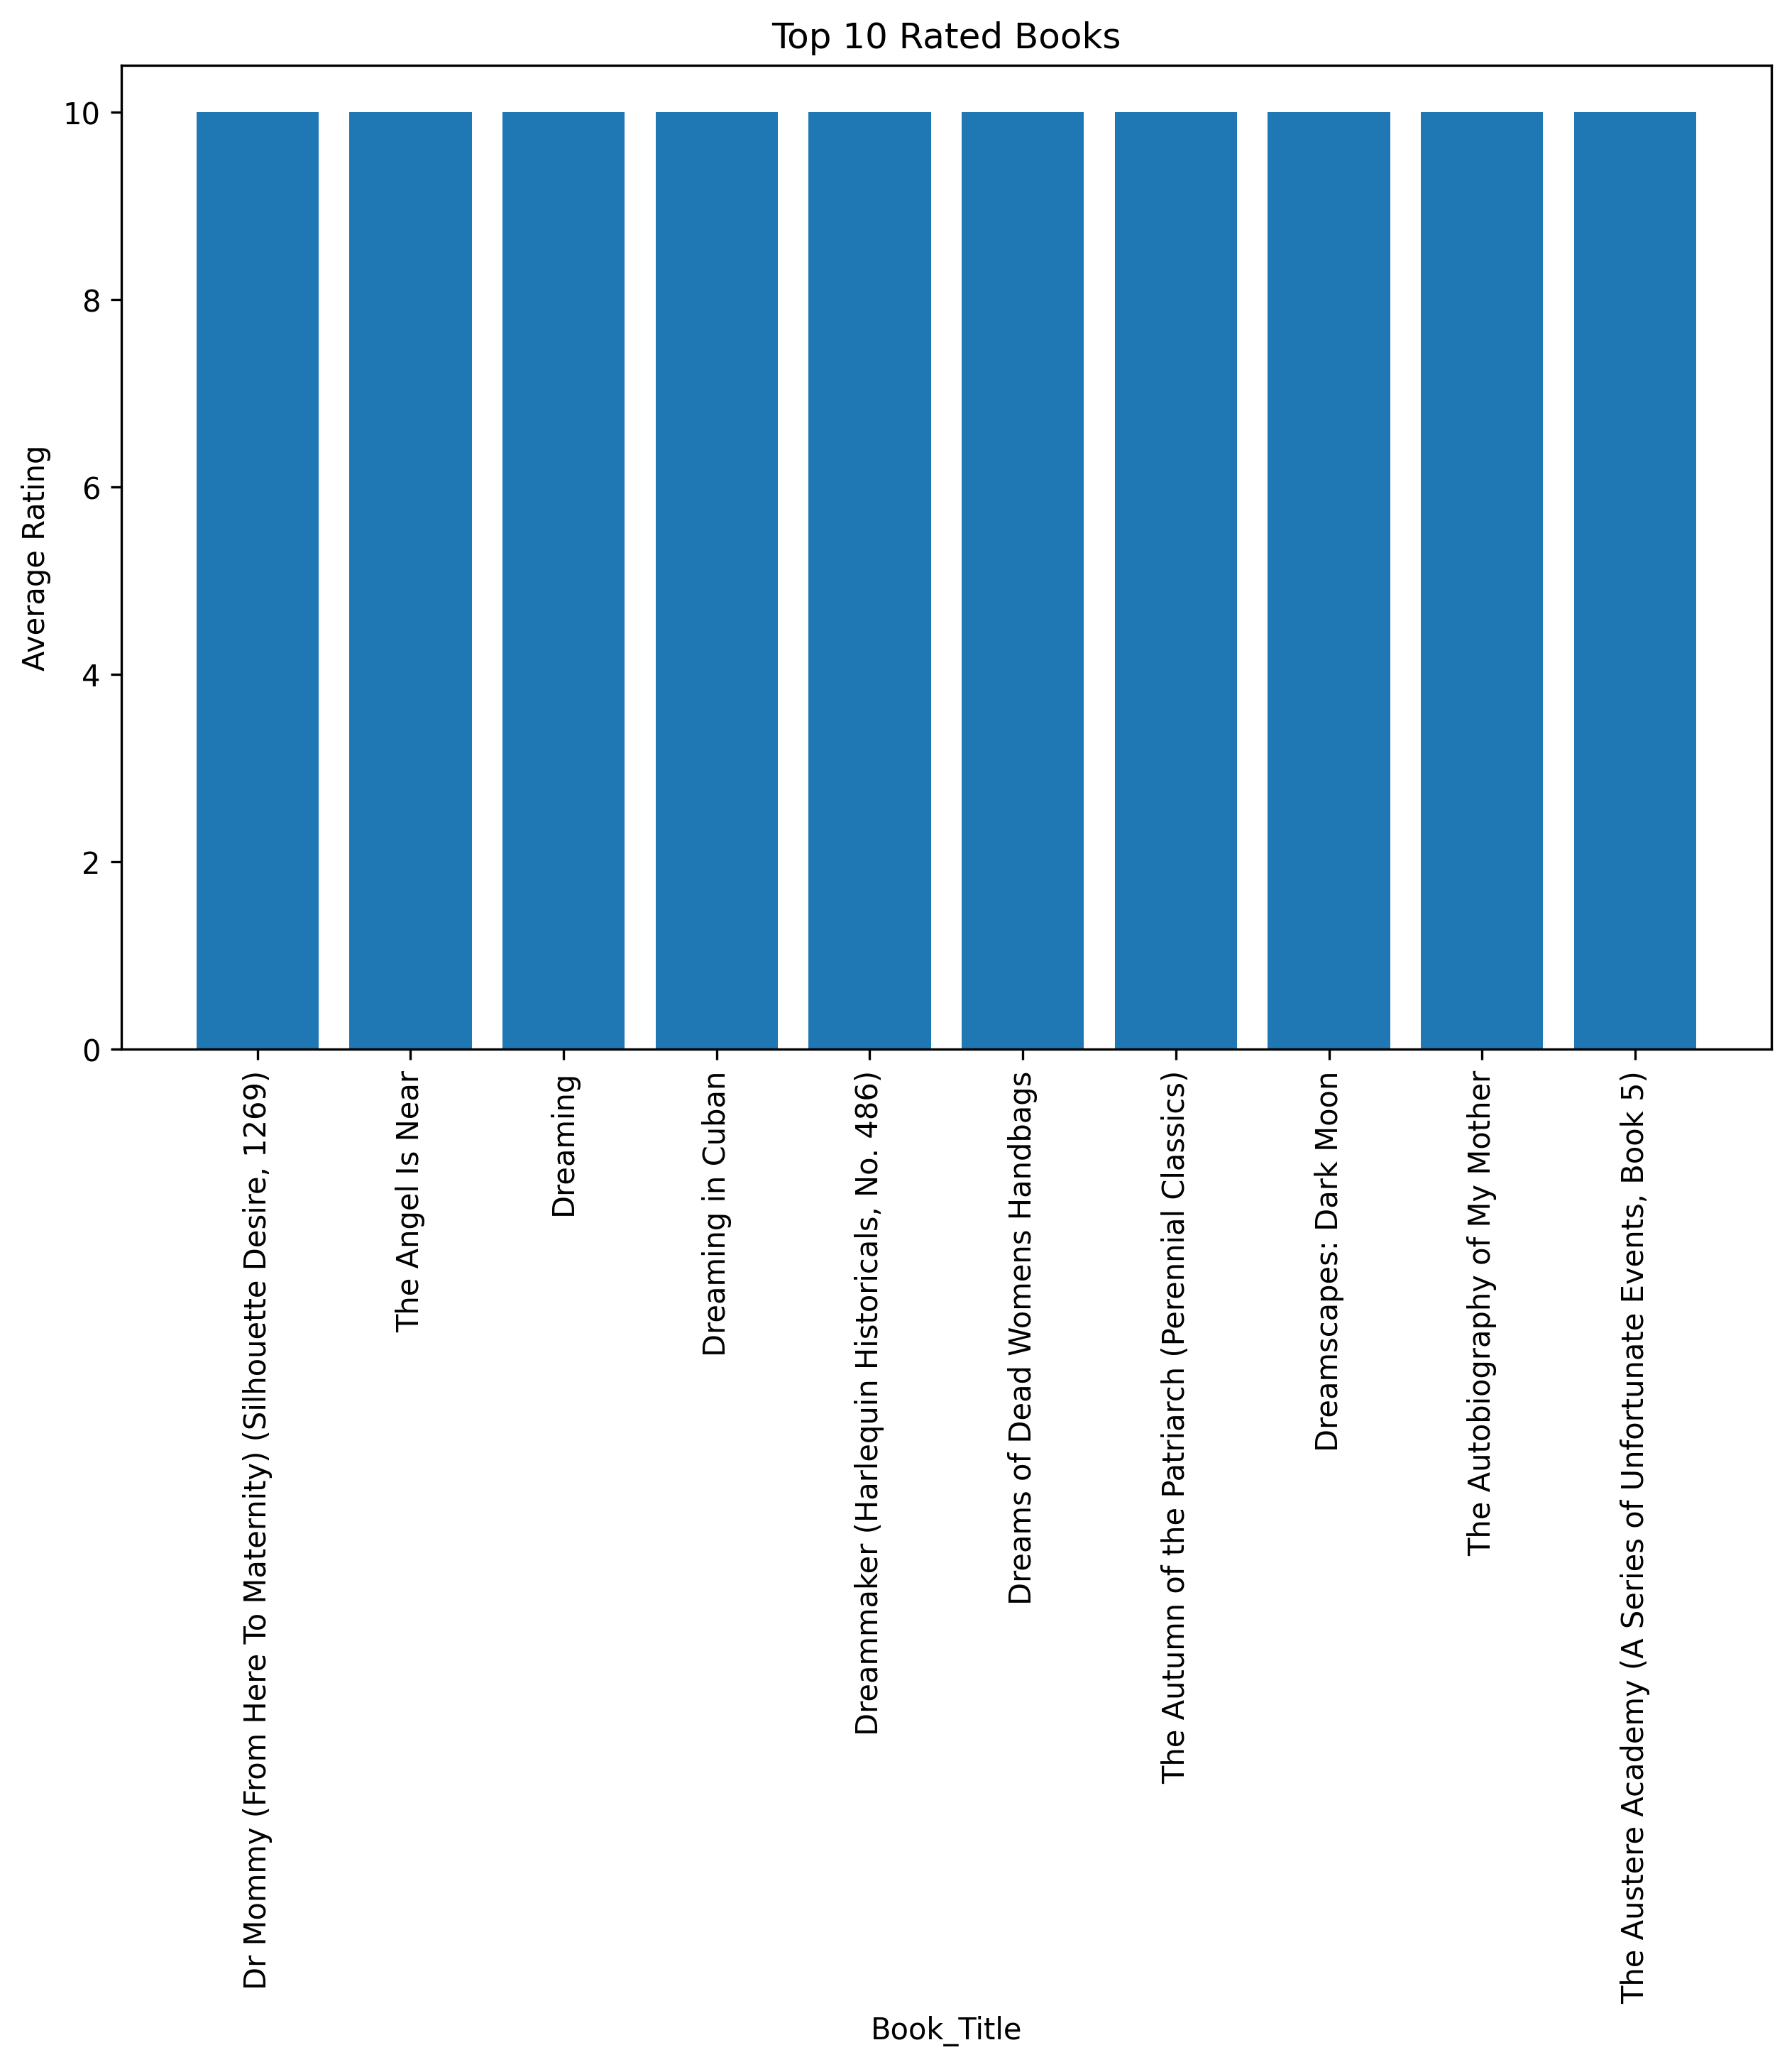

In [12]:
# Top N Rated Books (Bar Plot)
top_n = 10  # Change this to your desired N
top_rated_books = df.groupby('Book_Title')['Book_Rating'].mean().sort_values(ascending=False).head(top_n)
plt.figure(figsize=(10, 6))
plt.bar(top_rated_books.index, top_rated_books.values)
plt.title(f'Top {top_n} Rated Books')
plt.xlabel('Book_Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)

In [13]:
import random

def recommend_books_to_random_users(user_item_matrix, cosine_sim, num_users=5, top_n=5):
    # Get a list of unique user IDs
    user_ids = user_item_matrix.index

    # Randomly select 'num_users' users
    random_users = random.sample(list(user_ids), num_users)

    # Iterate through the randomly selected users and recommend books
    for user_id in random_users:
        user_ratings = user_item_matrix.loc[user_id]
        similar_books = cosine_sim.dot(user_ratings)
        
        # Convert the numpy array to a Pandas Series
        recommended_books = pd.Series(similar_books, index=user_item_matrix.columns)
        
        # Sort the books in descending order
        recommended_books = recommended_books.sort_values(ascending=False)
        
        print(f"Recommendations for User {user_id}:")
        print(recommended_books.head(top_n))
        print("\n")

# Call the function to recommend books to 5 random users
recommend_books_to_random_users(user_item_matrix, cosine_sim, num_users=5, top_n=5)

Recommendations for User 276768:
Book_Title
New Vegetarian: Bold and Beautiful Recipes for Every Occasion    4.0
 Jason, Madison &amp                                             0.0
Spy in the House of Love                                         0.0
Spring Break (Sweet Valley High Super Edition, No 3)             0.0
Spring Collection                                                0.0
dtype: float64


Recommendations for User 2103:
Book_Title
The Fist of God                          133.432941
Lord/Hi Cliff Manor (Gothic Romances)    133.432941
The Chronoliths                          133.432941
TWELFTH NIGHT                            133.432941
Armadillo                                133.432941
dtype: float64


Recommendations for User 161626:
Book_Title
The Greatest Generation                                                   10.0
 Jason, Madison &amp                                                       0.0
Spy Catcher: The Candid Autobiography of a Senior Intelligence Officer   